<center><img src="https://polytech.univ-lyon1.fr/uas/polytech/LOGO/UDL_logo_blanc-01%20(2).png" alt="drawing" style="width:100px;"/></center>

# Introduction à Python pour la Data Science

## Analyse de données & Datavisualisation

<a href="http://matplotlib.org/"><img src="http://matplotlib.org/_static/logo2.svg" alt="Smiley face" height="420" width="420"> 

Ce calepin est une version simplifée de celui développé par J.R. Johansson. D'autres calepins du même auteur sont accessibles [ici](http://jrjohansson.github.io).

**Important** la commande ci-dessous provoque l'insertion des gaphiques dans le calepin plutôt que l'ouverture de nouvelles fenêtres.

In [ ]:
%matplotlib inline

## 1 Introduction
### 1.1 Principe

Matplotlib est une librairie pour des graphes 2D et 3D, 
* facile à utiliser,
* intègrant des formats $\LaTeX$ pour les libellés,
* contrôlant tous les éléments d'une figure, 
* supportant tous le sformats png, pdf, eps..
Plus d'information sur la [page de Matplotlib](http://matplotlib.org/)

Pour démarrer avec Matplotlib dans un programme Python, inclure les objets du module `pylab`. Plus facile:

In [1]:
from pylab import * 

Ou importer le module `matplotlib.pyplot` avec l'identifiant `plt`. Plus correct pour éviter de charger tous les objets:

In [2]:
# import matplotlib
import matplotlib.pyplot as plt

In [3]:
import numpy as np

### 1.2 MATLAB-like API

La façon la plus simple d'utiliser matplotlib est de le faire par l'API de type MATLAB compatible avec les fonctions graphique de MATLAB. 

In [4]:
from pylab import *

Example élémentaire d'utilisation de l'API.

In [5]:
x = np.linspace(0, 5, 10)
y = x ** 2

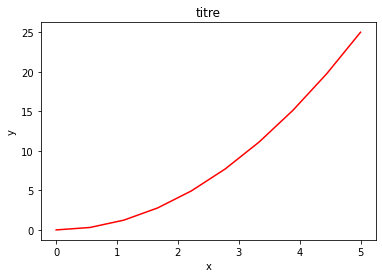

In [6]:
figure()
plot(x, y, 'r')
xlabel('x')
ylabel('y')
title('titre')
show()

La plupart des fonctions MATLAB sont incluses dans `pylab`.

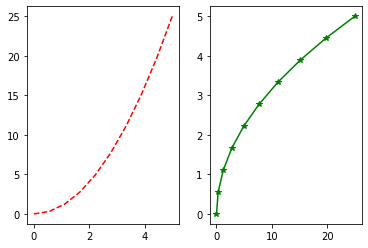

In [7]:
subplot(1,2,1)
plot(x, y, 'r--')
subplot(1,2,2)
plot(y, x, 'g*-');
show()

Cette API est limitée à des graphes rudimentaires. Les fonctionalités orientées objet de Matplotlib sont à privilégier pour des graphes plus élaborées. 

## 2 Matplotlib orienté objet
### 2.1 Syntaxe de base

L'idée principale de la programmation orientée objet est d'avoir des objets sur lesquels on peut appliquer des fonctions et des actions, et aucun objet ou état du programme ne doit être global (comme l'API de type MATLAB). Le véritable avantage de cette approche devient apparent lorsque plus d'une figure est créée, ou lorsqu'une figure contient plus d'un diagramme. 

Pour utiliser l'API orientée objet, nous commençons comme dans l'exemple précédent, mais au lieu de créer une nouvelle instance de figure globale, nous stockons une référence à l'instance de figure nouvellement créée dans la variable `fig`, et à partir de celle-ci nous créons une nouvelle instance d'axe `axes` en utilisant la méthode `add_axes` dans l'instance de classe `figure` :

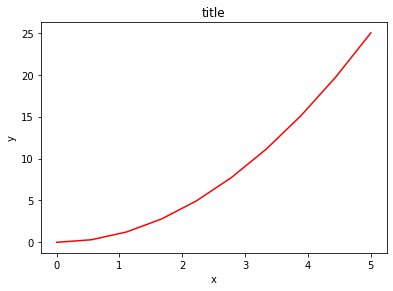

In [8]:
fig = plt.figure()

axes = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # left, bottom, width, height (range 0 to 1)

axes.plot(x, y, 'r')

axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_title('title');
show()

Bien que cela implique un peu plus de code, l'avantage est que nous avons maintenant le contrôle total de l'emplacement des axes de tracé et que nous pouvons facilement ajouter plus d'un axe à la figure :

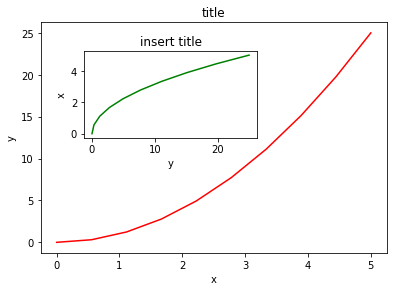

In [9]:
fig = plt.figure()

axes1 = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # main axes
axes2 = fig.add_axes([0.2, 0.5, 0.4, 0.3]) # inset axes

# main figure
axes1.plot(x, y, 'r')
axes1.set_xlabel('x')
axes1.set_ylabel('y')
axes1.set_title('title')

# insert
axes2.plot(y, x, 'g')
axes2.set_xlabel('y')
axes2.set_ylabel('x')
axes2.set_title('insert title');
show;

Si nous ne nous soucions pas d'être explicite sur l'endroit où nos axes de tracé sont placés dans le canevas de la figure, alors nous pouvons utiliser l'un des nombreux gestionnaires d'axes de matplotlib. un des choix possibles est `subplots`, qui peut être utilisé comme ceci :

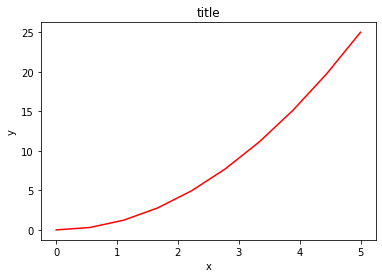

In [10]:
fig, axes = plt.subplots()

axes.plot(x, y, 'r')
axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_title('title');
show()

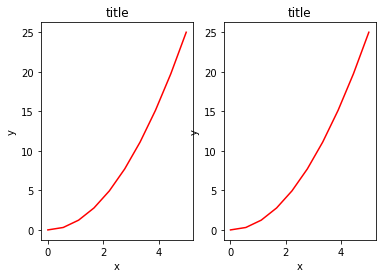

In [11]:
fig, axes = plt.subplots(nrows=1, ncols=2)

for ax in axes:
    ax.plot(x, y, 'r')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title('title')
show()

Nous pouvons remédier au chevauchement en utilisant la méthode `fig.tight_layout`, qui ajuste automatiquement les positions des axes sur le canevas de la figure de façon à ce que le contenu ne se chevauche pas :

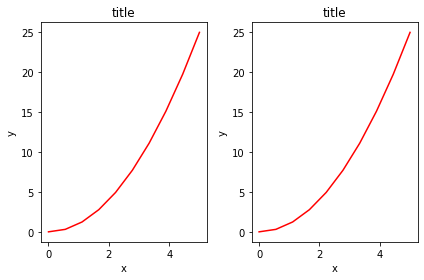

In [12]:
fig, axes = plt.subplots(nrows=1, ncols=2)

for ax in axes:
    ax.plot(x, y, 'r')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title('title')
    
fig.tight_layout()
show()

### 2.2 Tailles et proportions

Matplotlib permet de spécifier le ratio d'aspect, le DPI et la taille de la figure lors de la création de l'objet `Figure`, en utilisant les arguments des mots clés `figsize` et `dpi`. `figsize` est un tuple de la largeur et de la hauteur de la figure en pouces, et `dpi` est le nombre de points par pouce (pixel par pouce). Pour créer une figure de 800x400 pixels, 100 points par pouce, nous pouvons faire ce qui suit :

In [13]:
fig = plt.figure(figsize=(8,4), dpi=100)

<Figure size 800x400 with 0 Axes>

Les mêmes arguments peuvent également être passés aux gestionnaires de mise en page, comme la fonction `subplots` :

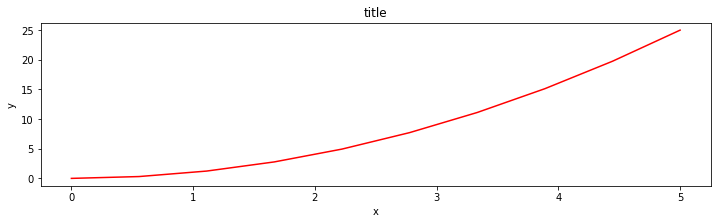

In [14]:
fig, axes = plt.subplots(figsize=(12,3))

axes.plot(x, y, 'r')
axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_title('title');
show()

### 2.3 Sauver les figures

Pour sauvegarder une figure dans un fichier, nous pouvons utiliser la méthode `savefig` de la classe `Figure` :

In [15]:
fig.savefig("filename.png")

Ici, nous pouvons également spécifier le DPI et choisir entre différents formats de sortie :

In [16]:
fig.savefig("filename.png", dpi=200)

#### Quels sont les formats disponibles et quels sont ceux à utiliser pour une qualité optimale ?

Matplotlib peut générer une sortie de haute qualité dans un certain nombre de formats, notamment PNG, JPG, EPS, SVG, PGF et PDF. Pour les articles scientifiques, je recommande d'utiliser le format PDF autant que possible. (Les documents LaTeX compilés avec `pdflatex` peuvent inclure des PDFs en utilisant la commande `includegraphics`).

### 2.4 Légendes, libellés et titres

Maintenant que nous avons couvert les bases de la création d'un canevas de figure et de l'ajout d'instances d'axes au canevas, voyons comment décorer une figure avec des titres, des étiquettes d'axes et des légendes.

**Titres**

Un titre peut être ajouté à chaque instance d'axe dans une figure. Pour définir le titre, utilisez la méthode `set_title` dans l'instance d'axe :

In [17]:
ax.set_title("title");

**Libellés des axes**

De la même manière, avec les méthodes `set_xlabel` et `set_ylabel`, nous pouvons définir les étiquettes des axes X et Y :

In [18]:
ax.set_xlabel("x")
ax.set_ylabel("y");

**Légendes**

Les légendes pour les courbes d'une figure peuvent être ajoutées de deux façons. La première consiste à utiliser la méthode `legend` de l'objet axis et à lui passer une liste/un couple de textes de légende pour les courbes précédemment définies :

In [19]:
ax.legend(["curve1", "curve2", "curve3"]);

La méthode décrite ci-dessus suit l'API de MATLAB. Elle est quelque peu sujette aux erreurs et peu flexible si des courbes sont ajoutées ou retirées de la figure (ce qui entraîne une courbe mal étiquetée).

Une meilleure méthode consiste à utiliser l'argument du mot-clé `label="label text"` lorsque des graphiques ou d'autres objets sont ajoutés à la figure, puis à utiliser la méthode `legend` sans argument pour ajouter la légende à la figure : 

In [20]:
ax.plot(x, x**2, label="curve1")
ax.plot(x, x**3, label="curve2")
ax.legend();

L'avantage de cette méthode est que si des courbes sont ajoutées ou retirées de la figure, la légende est automatiquement mise à jour en conséquence. 

La fonction `legend` prend un argument mot-clé optionnel `loc` qui peut être utilisé pour spécifier où dans la figure la légende doit être dessinée. Les valeurs autorisées de `loc` sont des codes numériques pour les différents endroits où la légende peut être dessinée. Voir http://matplotlib.org/users/legend_guide.html#legend-location pour plus de détails. Certaines des valeurs les plus courantes de `loc` sont :

In [21]:
ax.legend(loc=0) # let matplotlib decide the optimal location
ax.legend(loc=1) # upper right corner
ax.legend(loc=2) # upper left corner
ax.legend(loc=3) # lower left corner
ax.legend(loc=4) # lower right corner
# .. many more options are available

La figure suivante montre comment utiliser le titre de la figure, les étiquettes des axes et les légendes décrits ci-dessus :

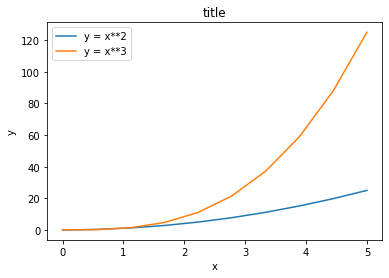

In [22]:
fig, ax = plt.subplots()

ax.plot(x, x**2, label="y = x**2")
ax.plot(x, x**3, label="y = x**3")
ax.legend(loc=2); # upper left corner
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('title');
show()

### 2.5 Formattage des textes: LaTeX et fontes

La figure ci-dessus est fonctionnelle, mais elle ne répond pas (encore) aux critères d'une figure utilisée dans une publication. Avant tout, nous devons disposer d'un texte au format LaTeX, et ensuite, nous devons pouvoir ajuster la taille de la police pour qu'elle apparaisse correctement dans une publication.

Matplotlib offre un excellent support pour LaTeX. Tout ce que nous devons faire est d'utiliser des signes dollar pour encapsuler LaTeX dans n'importe quel texte (légende, titre, étiquette, etc.). Par exemple, `"$y=x^3$"`.

Mais ici, nous pouvons rencontrer un problème légèrement subtil avec le code LaTeX et les chaînes de texte Python. Dans LaTeX, nous utilisons fréquemment la barre oblique inverse dans les commandes, par exemple `\alpha` pour produire le symbole $\alpha$. Mais la barre oblique inverse a déjà une signification dans les chaînes Python (le caractère de code d'échappement). Pour éviter que Python ne perturbe notre code latex, nous devons utiliser des chaînes de texte "brutes". Les chaînes de texte brutes sont précédées d'un "r", comme "r"\alpha"` ou "r'\alpha'`" au lieu de "\alpha"` ou "\alpha'`" :

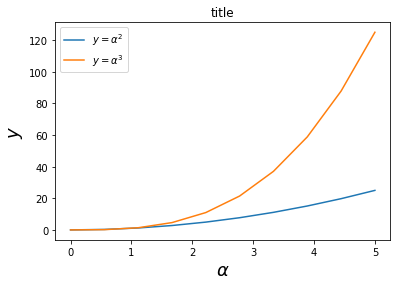

In [23]:
fig, ax = plt.subplots()

ax.plot(x, x**2, label=r"$y = \alpha^2$")
ax.plot(x, x**3, label=r"$y = \alpha^3$")
ax.legend(loc=2) # upper left corner
ax.set_xlabel(r'$\alpha$', fontsize=18)
ax.set_ylabel(r'$y$', fontsize=18)
ax.set_title('title');
show()

Nous pouvons également modifier la taille et la famille de la police globale, qui s'applique à tous les éléments de texte d'une figure (étiquettes de coche, étiquettes et titres des axes, légendes, etc...)

In [24]:
# Update the matplotlib configuration parameters:
matplotlib.rcParams.update({'font.size': 18, 'font.family': 'serif'})

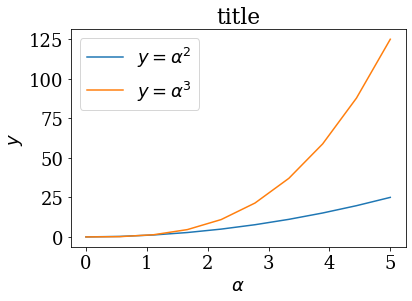

In [25]:
fig, ax = plt.subplots()

ax.plot(x, x**2, label=r"$y = \alpha^2$")
ax.plot(x, x**3, label=r"$y = \alpha^3$")
ax.legend(loc=2) # upper left corner
ax.set_xlabel(r'$\alpha$')
ax.set_ylabel(r'$y$')
ax.set_title('title');
show()

Les polices STIX constituent un bon choix de polices globales : 

In [26]:
# Update the matplotlib configuration parameters:
matplotlib.rcParams.update({'font.size': 18, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})

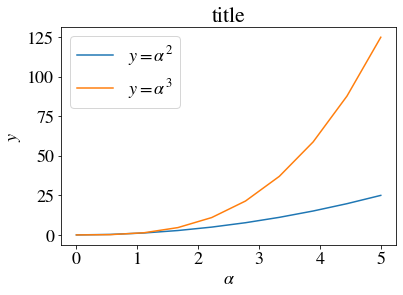

In [27]:
fig, ax = plt.subplots()

ax.plot(x, x**2, label=r"$y = \alpha^2$")
ax.plot(x, x**3, label=r"$y = \alpha^3$")
ax.legend(loc=2) # upper left corner
ax.set_xlabel(r'$\alpha$')
ax.set_ylabel(r'$y$')
ax.set_title('title');
show()

Ou, alternativement, nous pouvons demander que matplotlib utilise LaTeX pour rendre les éléments de texte dans la figure :

In [28]:
matplotlib.rcParams.update({'font.size': 18, 'text.usetex': True})

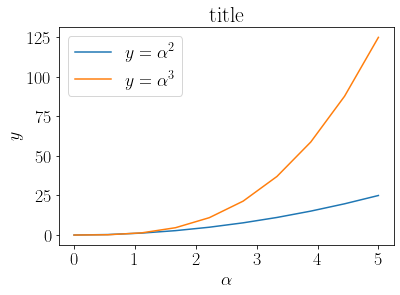

In [29]:
fig, ax = plt.subplots()

ax.plot(x, x**2, label=r"$y = \alpha^2$")
ax.plot(x, x**3, label=r"$y = \alpha^3$")
ax.legend(loc=2) # upper left corner
ax.set_xlabel(r'$\alpha$')
ax.set_ylabel(r'$y$')
ax.set_title('title');
show()

In [30]:
# restore
matplotlib.rcParams.update({'font.size': 12, 'font.family': 'sans', 'text.usetex': False})

### 2.6 Couleurs, largeur et types de lignes

#### Couleurs

Avec Matplotlib, nous pouvons définir les couleurs des lignes et autres éléments graphiques de plusieurs façons. Tout d'abord, nous pouvons utiliser la syntaxe de type MATLAB où `'b'` signifie bleu, `'g'` signifie vert, etc. L'API MATLAB pour la sélection des styles de lignes est également prise en charge : par exemple, "b.-" signifie une ligne bleue avec des points :

In [31]:
# MATLAB style line color and style 
ax.plot(x, x**2, 'b.-') # blue line with dots
ax.plot(x, x**3, 'g--') # green dashed line

Nous pouvons également définir les couleurs par leur nom ou leur code hexagonal RVB et fournir éventuellement une valeur alpha en utilisant les arguments des mots-clés `color` et `alpha` :

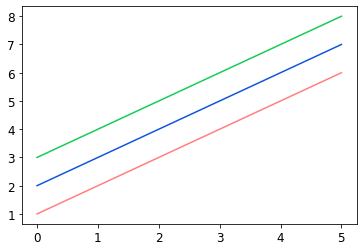

In [32]:
fig, ax = plt.subplots()

ax.plot(x, x+1, color="red", alpha=0.5) # half-transparant red
ax.plot(x, x+2, color="#1155dd")        # RGB hex code for a bluish color
ax.plot(x, x+3, color="#15cc55")        # RGB hex code for a greenish color
show()

#### Styles de lignes et de marqueurs

Pour changer la largeur de la ligne, on peut utiliser l'argument mot-clé `linewidth` ou `lw`. Le style de ligne peut être sélectionné en utilisant les arguments mots-clés `linestyle` ou `ls` :

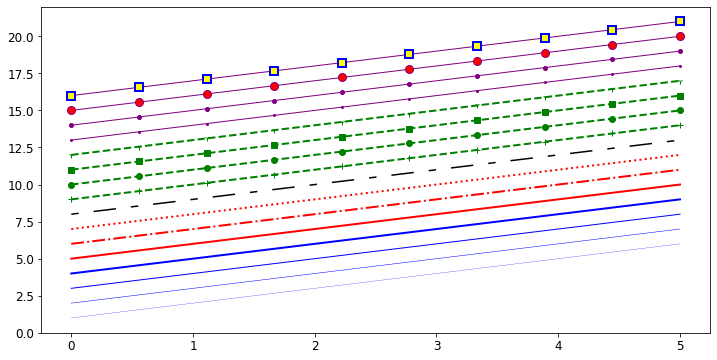

In [33]:
fig, ax = plt.subplots(figsize=(12,6))

ax.plot(x, x+1, color="blue", linewidth=0.25)
ax.plot(x, x+2, color="blue", linewidth=0.50)
ax.plot(x, x+3, color="blue", linewidth=1.00)
ax.plot(x, x+4, color="blue", linewidth=2.00)

# possible linestype options ‘-‘, ‘--’, ‘-.’, ‘:’, ‘steps’
ax.plot(x, x+5, color="red", lw=2, linestyle='-')
ax.plot(x, x+6, color="red", lw=2, ls='-.')
ax.plot(x, x+7, color="red", lw=2, ls=':')

# custom dash
line, = ax.plot(x, x+8, color="black", lw=1.50)
line.set_dashes([5, 10, 15, 10]) # format: line length, space length, ...

# possible marker symbols: marker = '+', 'o', '*', 's', ',', '.', '1', '2', '3', '4', ...
ax.plot(x, x+ 9, color="green", lw=2, ls='--', marker='+')
ax.plot(x, x+10, color="green", lw=2, ls='--', marker='o')
ax.plot(x, x+11, color="green", lw=2, ls='--', marker='s')
ax.plot(x, x+12, color="green", lw=2, ls='--', marker='1')

# marker size and color
ax.plot(x, x+13, color="purple", lw=1, ls='-', marker='o', markersize=2)
ax.plot(x, x+14, color="purple", lw=1, ls='-', marker='o', markersize=4)
ax.plot(x, x+15, color="purple", lw=1, ls='-', marker='o', markersize=8, markerfacecolor="red")
ax.plot(x, x+16, color="purple", lw=1, ls='-', marker='s', markersize=8, 
        markerfacecolor="yellow", markeredgewidth=2, markeredgecolor="blue");
show()

### 2.7 Contrôle des axes

L'apparence des axes est un aspect important d'une figure que nous devons souvent modifier pour réaliser un graphique de qualité pour une publication. Nous devons pouvoir contrôler l'emplacement des points et des étiquettes, modifier la taille de la police et éventuellement les étiquettes utilisées sur les axes. Dans cette section, nous allons examiner le contrôle de ces propriétés dans une figure Matplotlib.

#### Plot range

La première chose que l'on peut vouloir configurer est la portée des axes. Nous pouvons le faire en utilisant les méthodes `set_ylim` et `set_xlim` dans l'objet axis, ou `axis('tight')` pour obtenir automatiquement des plages d'axes "bien ajustées" :

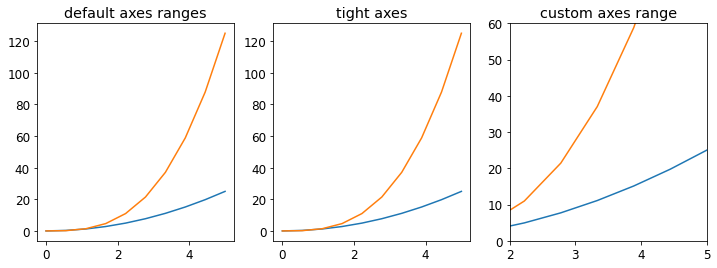

In [34]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

axes[0].plot(x, x**2, x, x**3)
axes[0].set_title("default axes ranges")

axes[1].plot(x, x**2, x, x**3)
axes[1].axis('tight')
axes[1].set_title("tight axes")

axes[2].plot(x, x**2, x, x**3)
axes[2].set_ylim([0, 60])
axes[2].set_xlim([2, 5])
axes[2].set_title("custom axes range");
show()

#### Logarithmic scale

Il est également possible de définir une échelle logarithmique pour l'un ou les deux axes. Cette fonctionnalité n'est en fait qu'une application d'un système de transformation plus général dans Matplotlib. Chacune des échelles des axes est définie séparément en utilisant les méthodes `set_xscale` et `set_yscale` qui acceptent un paramètre (avec la valeur "log" dans ce cas) :

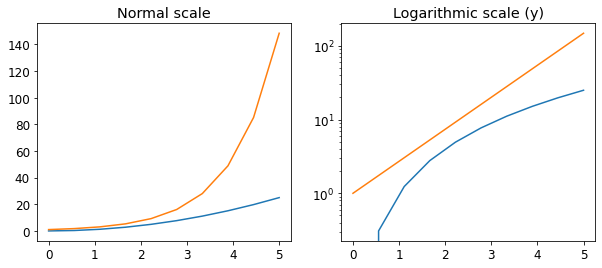

In [35]:
fig, axes = plt.subplots(1, 2, figsize=(10,4))
      
axes[0].plot(x, x**2, x, np.exp(x))
axes[0].set_title("Normal scale")

axes[1].plot(x, x**2, x, np.exp(x))
axes[1].set_yscale("log")
axes[1].set_title("Logarithmic scale (y)");
show()

### 2.8 Placement des échelles et libellés

Nous pouvons déterminer explicitement l'emplacement des libellés de l'axe avec les méthodes `set_xticks` et `set_yticks`, qui prennent toutes deux une liste de valeurs pour indiquer où les tics doivent être placés sur l'axe. Nous pouvons également utiliser les méthodes `set_xticklabels` et `set_yticklabels` pour fournir une liste de libellés personnalisés pour chaque emplacement de libellé :

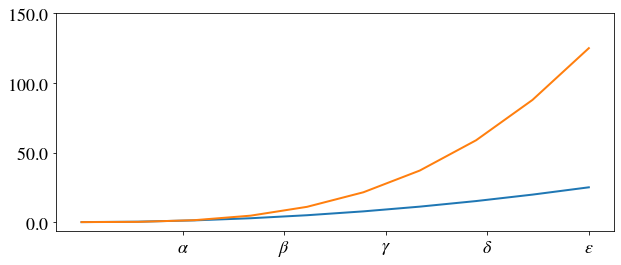

In [36]:
fig, ax = plt.subplots(figsize=(10, 4))

ax.plot(x, x**2, x, x**3, lw=2)

ax.set_xticks([1, 2, 3, 4, 5])
ax.set_xticklabels([r'$\alpha$', r'$\beta$', r'$\gamma$', r'$\delta$', r'$\epsilon$'], fontsize=18)

yticks = [0, 50, 100, 150]
ax.set_yticks(yticks)
ax.set_yticklabels(["$%.1f$" % y for y in yticks], fontsize=18); # use LaTeX formatted labels
show()

Il existe un certain nombre de méthodes plus avancées pour contrôler le placement des libellés majeurs et mineurs dans les figures de Matplotlib, comme le placement automatique en fonction de différentes politiques. Voir http://matplotlib.org/api/ticker_api.html pour plus de détails.

#### Scientific notation

Avec de grands nombres sur les axes, il est souvent préférable d'utiliser la notation scientifique :

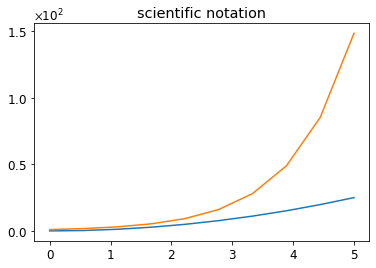

In [37]:
fig, ax = plt.subplots(1, 1)
      
ax.plot(x, x**2, x, np.exp(x))
ax.set_title("scientific notation")

ax.set_yticks([0, 50, 100, 150])

from matplotlib import ticker
formatter = ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(True) 
formatter.set_powerlimits((-1,1)) 
ax.yaxis.set_major_formatter(formatter) 
show()

### 2.9 Formattage des espaces sur les axes

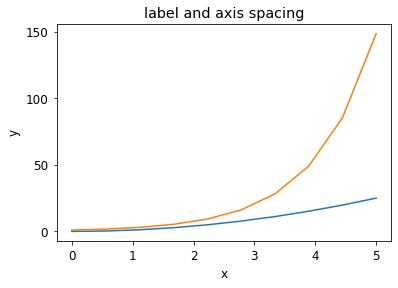

In [38]:
# distance between x and y axis and the numbers on the axes
matplotlib.rcParams['xtick.major.pad'] = 5
matplotlib.rcParams['ytick.major.pad'] = 5

fig, ax = plt.subplots(1, 1)
      
ax.plot(x, x**2, x, np.exp(x))
ax.set_yticks([0, 50, 100, 150])

ax.set_title("label and axis spacing")

# padding between axis label and axis numbers
ax.xaxis.labelpad = 5
ax.yaxis.labelpad = 5

ax.set_xlabel("x")
ax.set_ylabel("y");
show()

In [39]:
# restore defaults
matplotlib.rcParams['xtick.major.pad'] = 3
matplotlib.rcParams['ytick.major.pad'] = 3

#### Axis position adjustments

Malheureusement, lors de la sauvegarde des figures, les étiquettes sont parfois coupées, et il peut être nécessaire d'ajuster un peu la position des axes. Ceci peut être fait en utilisant `subplots_adjust` :

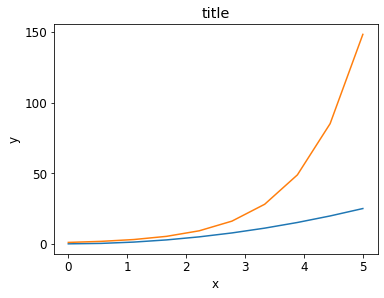

In [40]:
fig, ax = plt.subplots(1, 1)
      
ax.plot(x, x**2, x, np.exp(x))
ax.set_yticks([0, 50, 100, 150])

ax.set_title("title")
ax.set_xlabel("x")
ax.set_ylabel("y")

fig.subplots_adjust(left=0.15, right=.9, bottom=0.1, top=0.9);
show()

### 2.10 Grille

Avec la méthode `grid` de l'objet axis, nous pouvons activer et désactiver les lignes de la grille. Nous pouvons également personnaliser l'apparence des lignes de la grille en utilisant les mêmes arguments de mots-clés que la fonction `plot` :

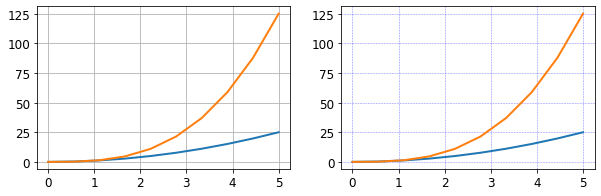

In [41]:
fig, axes = plt.subplots(1, 2, figsize=(10,3))

# default grid appearance
axes[0].plot(x, x**2, x, x**3, lw=2)
axes[0].grid(True)

# custom grid appearance
axes[1].plot(x, x**2, x, x**3, lw=2)
axes[1].grid(color='b', alpha=0.5, linestyle='dashed', linewidth=0.5)
show()

### 2.11 Double graphique

Il est parfois utile d'avoir deux axes x ou y dans une figure, par exemple pour tracer ensemble des courbes avec des unités différentes. Matplotlib supporte cela avec les fonctions `twinx` et `twiny` :

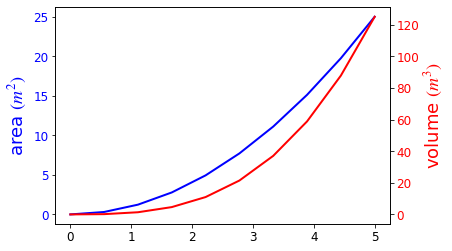

In [42]:
fig, ax1 = plt.subplots()

ax1.plot(x, x**2, lw=2, color="blue")
ax1.set_ylabel(r"area $(m^2)$", fontsize=18, color="blue")
for label in ax1.get_yticklabels():
    label.set_color("blue")
    
ax2 = ax1.twinx()
ax2.plot(x, x**3, lw=2, color="red")
ax2.set_ylabel(r"volume $(m^3)$", fontsize=18, color="red")
for label in ax2.get_yticklabels():
    label.set_color("red")
show()

### 2.12 Axes centrés

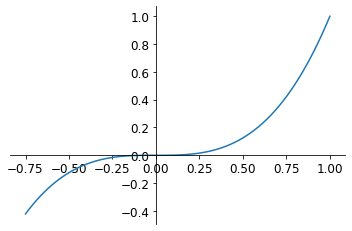

In [43]:
fig, ax = plt.subplots()

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0)) # set position of x spine to x=0

ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))   # set position of y spine to y=0

xx = np.linspace(-0.75, 1., 100)
ax.plot(xx, xx**3);
show()

### 2.13 Autres graphes 2D

En plus de la méthode régulière `plot`, il y a un certain nombre d'autres fonctions pour générer différents types de graphiques. Voir la galerie de graphiques de matplotlib pour une liste complète des types de graphiques disponibles : https://matplotlib.org/stable/gallery/index.html. Certains des plus utiles sont montrés ci-dessous :

In [44]:
n = np.array([0,1,2,3,4,5])

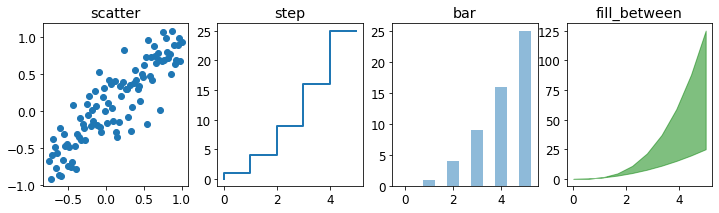

In [45]:
fig, axes = plt.subplots(1, 4, figsize=(12,3))

axes[0].scatter(xx, xx + 0.25*np.random.randn(len(xx)))
axes[0].set_title("scatter")

axes[1].step(n, n**2, lw=2)
axes[1].set_title("step")

axes[2].bar(n, n**2, align="center", width=0.5, alpha=0.5)
axes[2].set_title("bar")

axes[3].fill_between(x, x**2, x**3, color="green", alpha=0.5);
axes[3].set_title("fill_between");
show()

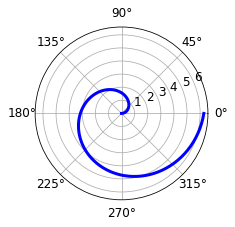

In [46]:
# polar plot using add_axes and polar projection
fig = plt.figure()
ax = fig.add_axes([0.0, 0.0, .6, .6], polar=True)
t = np.linspace(0, 2 * np.pi, 100)
ax.plot(t, t, color='blue', lw=3);
show()

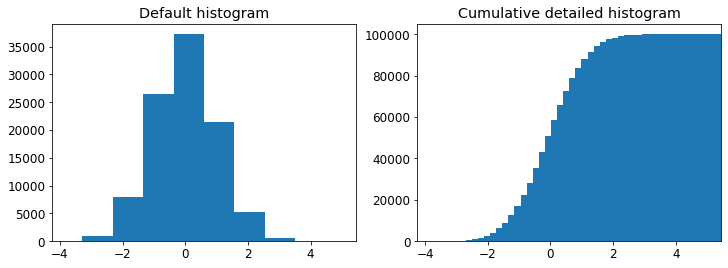

In [47]:
# A histogram
n = np.random.randn(100000)
fig, axes = plt.subplots(1, 2, figsize=(12,4))

axes[0].hist(n)
axes[0].set_title("Default histogram")
axes[0].set_xlim((min(n), max(n)))

axes[1].hist(n, cumulative=True, bins=50)
axes[1].set_title("Cumulative detailed histogram")
axes[1].set_xlim((min(n), max(n)));
show()

### 2.14 Textes d'annotation

Annoter du texte dans les figures de Matplotlib peut être réaliser en utilisant la fonction `text`. Elle supporte le formatage LaTeX tout comme les textes des étiquettes d'axes et les titres :

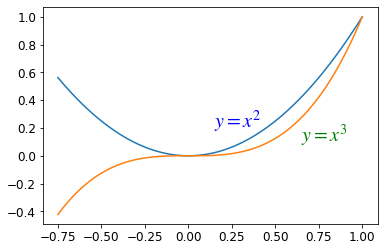

In [48]:
fig, ax = plt.subplots()

ax.plot(xx, xx**2, xx, xx**3)

ax.text(0.15, 0.2, r"$y=x^2$", fontsize=20, color="blue")
ax.text(0.65, 0.1, r"$y=x^3$", fontsize=20, color="green");
show()

### 2.15 Figures avec sous graphes

Les axes peuvent être ajoutés à un canevas de Figure Matplotlib manuellement en utilisant `fig.add_axes` ou en utilisant un gestionnaire de mise en page de sous-figure tel que `subplots`, `subplot2grid`, ou `gridspec` :

#### subplots

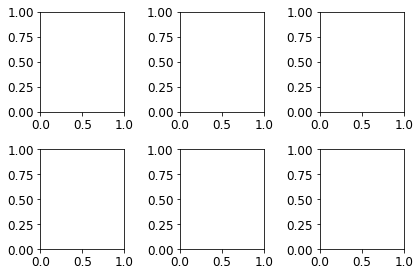

In [49]:
fig, ax = plt.subplots(2, 3)
fig.tight_layout()
show()

#### subplot2grid

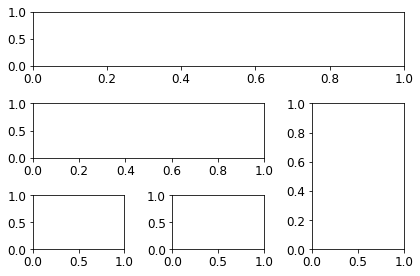

In [50]:
fig = plt.figure()
ax1 = plt.subplot2grid((3,3), (0,0), colspan=3)
ax2 = plt.subplot2grid((3,3), (1,0), colspan=2)
ax3 = plt.subplot2grid((3,3), (1,2), rowspan=2)
ax4 = plt.subplot2grid((3,3), (2,0))
ax5 = plt.subplot2grid((3,3), (2,1))
fig.tight_layout()
show()

#### gridspec

In [51]:
import matplotlib.gridspec as gridspec

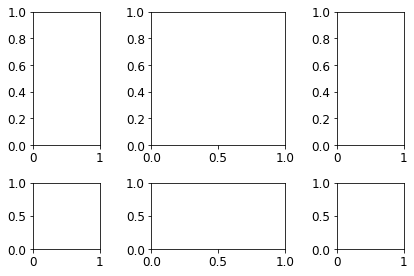

In [52]:
fig = plt.figure()

gs = gridspec.GridSpec(2, 3, height_ratios=[2,1], width_ratios=[1,2,1])
for g in gs:
    ax = fig.add_subplot(g)
    
fig.tight_layout()
show()

#### add_axes

L'ajout manuel d'axes avec `add_axes` est utile pour ajouter des encarts aux figures :

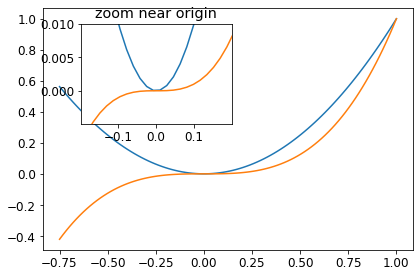

In [53]:
fig, ax = plt.subplots()

ax.plot(xx, xx**2, xx, xx**3)
fig.tight_layout()

# inset
inset_ax = fig.add_axes([0.2, 0.55, 0.35, 0.35]) # X, Y, width, height

inset_ax.plot(xx, xx**2, xx, xx**3)
inset_ax.set_title('zoom near origin')

# set axis range
inset_ax.set_xlim(-.2, .2)
inset_ax.set_ylim(-.005, .01)

# set axis tick locations
inset_ax.set_yticks([0, 0.005, 0.01])
inset_ax.set_xticks([-0.1,0,.1]);
show()

### 2.16 Graphes de contour

Les cartes de couleurs et les figures de contour sont utiles pour tracer les fonctions de deux variables. Dans la plupart de ces fonctions, nous utiliserons une carte de couleurs pour coder une dimension des données. Il existe un certain nombre de cartes de couleurs prédéfinies. Il est relativement simple de définir des cartes de couleurs personnalisées. Pour obtenir une liste des cartes de couleurs prédéfinies, consultez : https://scipy-cookbook.readthedocs.io/items/Matplotlib_Show_colormaps.html.

In [54]:
alpha = 0.7
phi_ext = 2 * np.pi * 0.5

def flux_qubit_potential(phi_m, phi_p):
    return 2 + alpha - 2 * np.cos(phi_p) * np.cos(phi_m) - alpha * np.cos(phi_ext - 2*phi_p)

In [55]:
phi_m = np.linspace(0, 2*np.pi, 100)
phi_p = np.linspace(0, 2*np.pi, 100)
X,Y = np.meshgrid(phi_p, phi_m)
Z = flux_qubit_potential(X, Y).T

#### pcolor

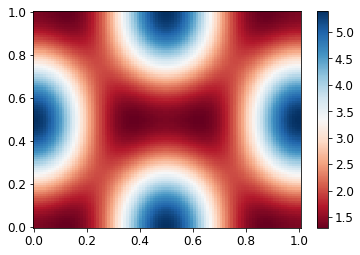

In [56]:
fig, ax = plt.subplots()

p = ax.pcolor(X/(2*np.pi), Y/(2*np.pi), Z, cmap=matplotlib.cm.RdBu, vmin=abs(Z).min(), vmax=abs(Z).max())
cb = fig.colorbar(p, ax=ax)
show()

#### imshow

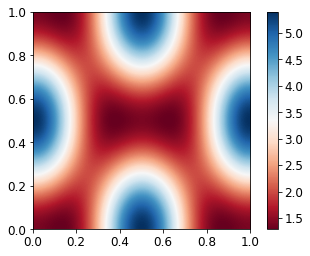

In [57]:
fig, ax = plt.subplots()

im = ax.imshow(Z, cmap=matplotlib.cm.RdBu, vmin=abs(Z).min(), vmax=abs(Z).max(), extent=[0, 1, 0, 1])
im.set_interpolation('bilinear')

cb = fig.colorbar(im, ax=ax)
show()

#### contour

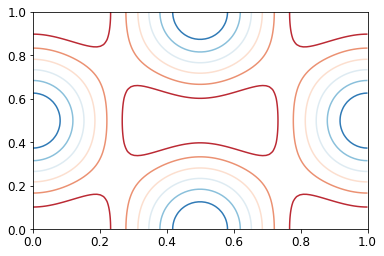

In [58]:
fig, ax = plt.subplots()

cnt = ax.contour(Z, cmap=matplotlib.cm.RdBu, vmin=abs(Z).min(), vmax=abs(Z).max(), extent=[0, 1, 0, 1])
show()

## 3 graphes 3D 

Pour utiliser des graphiques 3D dans Matplotlib, nous devons d'abord créer une instance de la classe `Axes3D`. Les axes 3D peuvent être ajoutés à un canevas de figure matplotlib exactement de la même manière que les axes 2D ; ou, plus commodément, en passant un argument mot-clé `projection='3d'` aux méthodes `add_axes` ou `add_subplot`.

In [59]:
from mpl_toolkits.mplot3d.axes3d import Axes3D

### 3.1  Surface plots

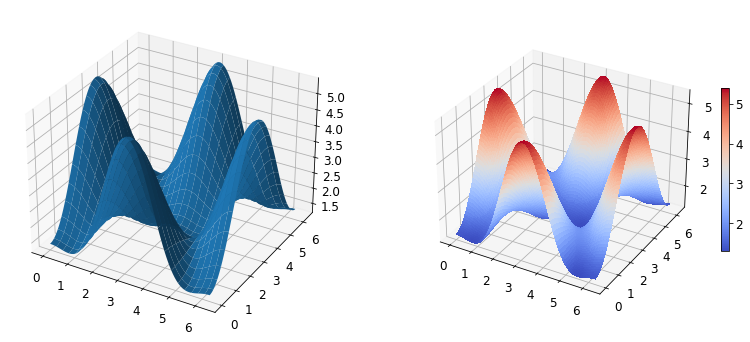

In [60]:
fig = plt.figure(figsize=(14,6))

# `ax` is a 3D-aware axis instance because of the projection='3d' keyword argument to add_subplot
ax = fig.add_subplot(1, 2, 1, projection='3d')

p = ax.plot_surface(X, Y, Z, rstride=4, cstride=4, linewidth=0)

# surface_plot with color grading and color bar
ax = fig.add_subplot(1, 2, 2, projection='3d')
p = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=matplotlib.cm.coolwarm, linewidth=0, antialiased=False)
cb = fig.colorbar(p, shrink=0.5)
show()

#### Wire-frame plot

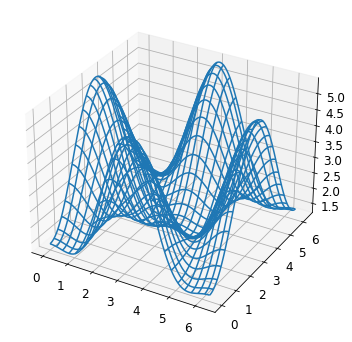

In [61]:
fig = plt.figure(figsize=(8,6))

ax = fig.add_subplot(1, 1, 1, projection='3d')

p = ax.plot_wireframe(X, Y, Z, rstride=4, cstride=4)
show()

### 3.2 Coutour plots with projections

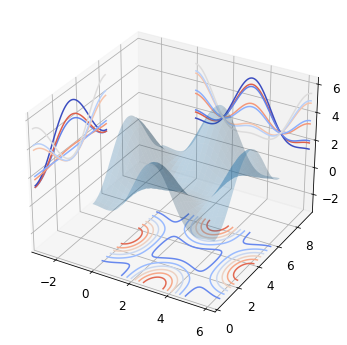

In [62]:
fig = plt.figure(figsize=(8,6))

ax = fig.add_subplot(1,1,1, projection='3d')

ax.plot_surface(X, Y, Z, rstride=4, cstride=4, alpha=0.25)
cset = ax.contour(X, Y, Z, zdir='z', offset=-np.pi, cmap=matplotlib.cm.coolwarm)
cset = ax.contour(X, Y, Z, zdir='x', offset=-np.pi, cmap=matplotlib.cm.coolwarm)
cset = ax.contour(X, Y, Z, zdir='y', offset=3*np.pi, cmap=matplotlib.cm.coolwarm)

ax.set_xlim3d(-np.pi, 2*np.pi);
ax.set_ylim3d(0, 3*np.pi);
ax.set_zlim3d(-np.pi, 2*np.pi);
show()

#### Change the view angle

Nous pouvons changer la perspective d'un graphique 3D en utilisant la méthode `view_init`, qui prend deux arguments : `elevation` et `azimuth` angle (en degrés) :

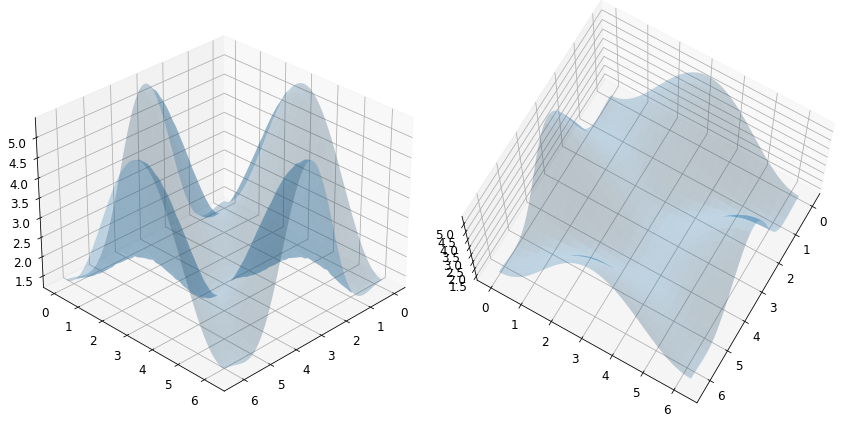

In [63]:
fig = plt.figure(figsize=(12,6))

ax = fig.add_subplot(1,2,1, projection='3d')
ax.plot_surface(X, Y, Z, rstride=4, cstride=4, alpha=0.25)
ax.view_init(30, 45)

ax = fig.add_subplot(1,2,2, projection='3d')
ax.plot_surface(X, Y, Z, rstride=4, cstride=4, alpha=0.25)
ax.view_init(70, 30)

fig.tight_layout()
show()

## 4 Compléments

* http://www.matplotlib.org - Page web page de Matplotlib.
* https://github.com/matplotlib/matplotlib - Code source de Matplotlib.
* http://matplotlib.org/gallery.html - Gallerie des possibilités graphiques.
* http://www.loria.fr/~rougier/teaching/matplotlib - Tutoriel sur Matplotlib.
* http://scipy-lectures.org/intro/matplotlib/index.html - Autre référence Matplotlib.


## Enseignant
Patrice Mazel - patrice.mazel@protonmail.com - 3A MAM 2021/2022